# Car Sales Project (Sprint 4)
In this project we'll be analizing the car sales dataframe. First we're going to get our data ready for better analyzing by checking for duplicates and missing data. Then, we'll remove them so we can have cleaner information.
After we have prepared our data we'll create visualizations to analyze how the price relates with the different characteristcs on the dataframe and how that could affect purchase.



## Importing libraries

In [5]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## Reading the dataframe
Here, we're reading the dataframe and using info() to get a general picture of it and printing a sample to have a more visual idea.

In [6]:
df_car_sales = pd.read_csv('/Users/cristinagomez/car_sales/vehicles_us.csv')
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [7]:
df_car_sales.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
41383,10750,2010.0,chevrolet camaro,excellent,6.0,gas,103030.0,automatic,coupe,white,NaN,2018-10-03,36
32200,9995,2012.0,ram 1500,good,8.0,gas,168146.0,manual,pickup,black,1.0,2018-09-08,2
21921,3695,2010.0,nissan versa,excellent,4.0,gas,74000.0,manual,sedan,red,NaN,2019-03-30,31
49911,3995,2007.0,ford explorer,good,6.0,gas,131193.0,automatic,SUV,white,1.0,2019-03-20,86
1536,12495,2008.0,chevrolet silverado 2500hd,excellent,8.0,gas,NaN,automatic,pickup,blue,1.0,2019-01-19,61
8689,9390,2011.0,jeep grand cherokee,excellent,6.0,gas,126631.0,automatic,SUV,black,1.0,2018-05-22,16
48271,5995,NaN,ram 1500,good,8.0,gas,239205.0,automatic,truck,NaN,NaN,2019-04-03,8
26998,3000,2003.0,ford explorer,good,6.0,gas,164000.0,automatic,SUV,grey,1.0,2018-08-25,10
33856,28000,2013.0,chevrolet silverado 2500hd,excellent,8.0,diesel,200.0,automatic,pickup,red,1.0,2018-08-17,25
43695,6990,2014.0,ford focus,excellent,4.0,gas,62623.0,automatic,sedan,white,NaN,2018-06-14,59


In [8]:
df_car_sales.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

## Pre-processing data
This is where we pre-process our data. We'll look for missing values and fix them, duplicated data and if any, remove it and verify data types and make the changes needed.

In [9]:
df_car_sales.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [10]:
df_car_sales.duplicated().sum()

0

In [11]:
df_car_sales['model_year'] = df_car_sales['model_year'].fillna(df_car_sales['model_year'].median())
df_car_sales['model_year'] = df_car_sales['model_year'].astype('int')

In [12]:
df_car_sales['is_4wd'] = df_car_sales['is_4wd'].fillna(df_car_sales['is_4wd'].median())
df_car_sales['is_4wd'] = df_car_sales['is_4wd'].astype('int')


In [13]:
df_car_sales['cylinders'] = df_car_sales['cylinders'].fillna(df_car_sales['cylinders'].median())
df_car_sales['cylinders'] = df_car_sales['cylinders'].astype('int')

In [14]:
df_car_sales['odometer'] = df_car_sales['odometer'].fillna(df_car_sales['odometer'].median())
df_car_sales['odometer'] = df_car_sales['odometer'].astype('int')

In [15]:
df_car_sales['paint_color'] = df_car_sales['paint_color'].fillna('Unknown')

In [16]:
df_car_sales['date_posted'] = pd.to_datetime(df_car_sales['date_posted'])

In [17]:
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


In [18]:
df_car_sales.describe()

,price,model_year,cylinders,odometer,is_4wd,date_posted,days_listed
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000
mean,12132.464920,1868.590121,5.499932,97854.326948,0.496303,2018-10-25 01:57:46.270742528,39.55476
min,1.000000,0.000000,0.000000,0.000000,0.000000,2018-05-01 00:00:00,0.00000
25%,5000.000000,2005.000000,4.000000,35896.000000,0.000000,2018-07-29 00:00:00,19.00000
50%,9000.000000,2010.000000,6.000000,99114.000000,0.000000,2018-10-25 00:00:00,33.00000
75%,16839.000000,2014.000000,8.000000,146541.000000,1.000000,2019-01-21 00:00:00,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,2019-04-19 00:00:00,271.00000
std,10040.803015,513.626950,2.431985,72940.007970,0.499991,NaN,28.20427


**Using describe() to get more insight**

In [19]:
numeric_cols = df_car_sales.select_dtypes(include=['int64', 'float64']).columns

Q1 = df_car_sales[numeric_cols].quantile(0.25)
Q3 = df_car_sales[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_car_sales[~((df_car_sales[numeric_cols] < lower_bound) | (df_car_sales[numeric_cols] > upper_bound)).any(axis=1)]

print(df_no_outliers)

       price  model_year           model  condition  cylinders fuel  odometer  \
0       9400        2011          bmw x5       good          6  gas    145000   
2       5500        2013  hyundai sonata   like new          4  gas    110000   
3       1500        2003      ford f-150       fair          8  gas         0   
4      14900        2017    chrysler 200  excellent          4  gas     80903   
5      14990        2014    chrysler 300  excellent          6  gas     57954   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249        2013   nissan maxima   like new          6  gas     88136   
51521   2700        2002     honda civic    salvage          4  gas    181500   
51522   3950        2009  hyundai sonata  excellent          4  gas    128000   
51523   7455        2013  toyota corolla       good          4  gas    139573   
51524   6300        2014   nissan altima       good          4  gas         0   

      transmission    type 

**We got rid of the outliers to have more accurate data**

In [20]:
df_car_sales.isna().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [21]:
df_car_sales.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
41425,7600,2011,chrysler town & country,excellent,6,gas,0,automatic,mini-van,grey,0,2018-12-31,139
45224,15500,2010,cadillac escalade,like new,8,gas,0,automatic,SUV,white,0,2019-04-04,53
4775,19990,2012,ford f-250 sd,good,8,gas,81207,automatic,truck,unknown,1,2018-10-09,19
3289,11999,2012,honda cr-v,excellent,4,gas,0,automatic,SUV,silver,1,2018-10-04,16
13597,2800,2003,ford focus se,excellent,4,gas,89188,automatic,sedan,red,0,2019-02-02,50
31894,4995,2003,chevrolet silverado 1500,good,8,gas,207779,automatic,truck,unknown,1,2018-07-22,38
8688,5390,2002,honda accord,excellent,0,gas,50417,automatic,sedan,silver,0,2018-10-08,48
14103,4200,2009,honda civic,good,4,gas,176800,automatic,sedan,black,0,2018-07-29,43
14823,1,2017,jeep grand cherokee,excellent,10,gas,53718,other,SUV,white,1,2019-04-17,5
5156,9990,2001,ford mustang,excellent,8,gas,60000,automatic,convertible,unknown,0,2018-08-13,34


In [22]:
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


**Double checking all the changes processed correctly**

## Visualization of data

Here we'll create some plots to visualize data. 

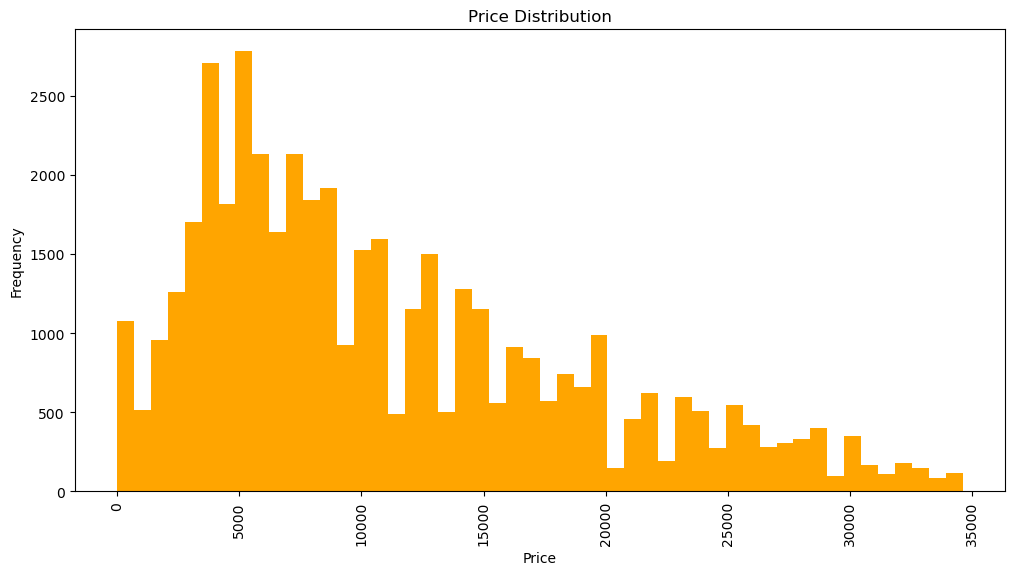

In [23]:
price_distribution_plot = df_no_outliers['price'].plot(kind='hist', figsize=(12, 6), bins=50, color='orange')

plt.title('Price Distribution')
plt.xlabel('Price')
plt.xticks(rotation=90)
plt.show()


**We can tell by this plot that there's more cars being sold on the 3,000 to 5,000 dollar range. The lowest amout are between 22,000 and 34,000 dollar range.**

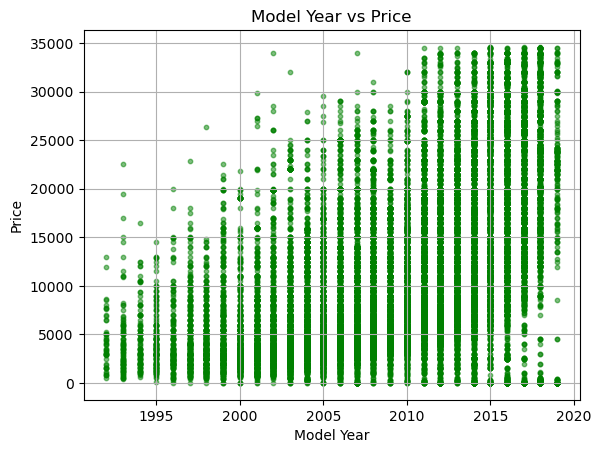

In [24]:
age_vs_price_plot = plt.scatter(df_no_outliers['model_year'], df_no_outliers['price'], c='green', alpha=0.5, s=10)
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.title('Model Year vs Price')
plt.grid(True)
plt.show()


**Just like expected, the newer the car, the higher the price.**

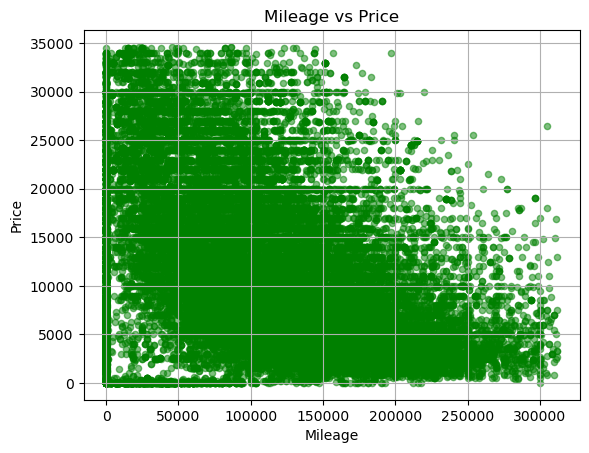

In [25]:
miles_vs_price_plot = plt.scatter(df_no_outliers['odometer'], df_no_outliers['price'], c='green', alpha=0.5, s=20)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.grid(True)
plt.show()

**We can see that with a small portion of exceptions. The lower the mileage the most expensive the car is being sold for and the higher the mileage, the cheaper the car.**

In [26]:
model_price = df_no_outliers.groupby('model')['price'].mean().reset_index()

fig = px.bar(model_price, x='model', y='price', height=600, title='Model vs Price', color='price')
fig.update_layout(xaxis_title='Model', yaxis_title='Average Price', xaxis_tickangle=-45)
fig.show()


**In this plot we can see the most expensive car in average is the Chevrolet Silverado 1500 crew. This makes sense because it's a bigger car. I don't think there's necessary a correlation between the make and the price but there is between the model and the price.**

## Conclusion

The results were as expected by confirming that the older cars and with a higher mileage are cheaper. This has to do with the way the depreatiation works and it's good to look at this factors when trying to purchase a car.